In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
# Import make_regression method to generate artificial data samples 
from sklearn.datasets import make_regression
from IPython.core.display import display, HTML
display(HTML("<style>.container{width: 100% ; !important} <\style>"))
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)
import statsmodels.api as sm

<span style="color: gray; font-family: Helvetica; font-size: 40px;">Linear regression</span>

## Goal:
<span style="color: black; font-family: Helvetica; font-size: 20px;">Linear regression is a statistical method used to model the relationship between a continuous dependent variable (also known as the target or response variable) and one or more independent variables (also known as predictors or features). The main goal is to find the best-fitting line (or hyperplane in multiple dimensions) that minimizes the differences between the observed and predicted values of the dependent variable.</span>  

## Equation:
<span style="color: black; font-family: Helvetica; font-size: 20px;"> The equation for linear regression is Y = β0 + β1X1 + β2X2 + ... + βnXn + ε, where Y is the dependent variable, β0 is the intercept, β1 to βn are coefficients for the independent variables X1 to Xn, and ε is the error term.</span>  


## Estimation: 
<span style="color: black; font-family: Helvetica; font-size: 20px;"> The coefficients (β) are estimated using a technique called Ordinary Least Squares (OLS), which minimizes the sum of squared differences between the observed and predicted values of the dependent variable. Alternatively, other estimation methods, such as gradient descent, can be used.</span> 

## Prediction: 
<span style="color: black; font-family: Helvetica; font-size: 20px;"> Once the coefficients are estimated, the model can be used to make predictions on new data by plugging in the values of the independent variables into the equation.</span> 

<span style="color: gray; font-family: Helvetica; font-size: 40px;">General assumptions of linear regression</span>


## Linearity: 
<span style="color: black; font-family: Helvetica; font-size: 20px;">The relationship between the dependent variable and independent variables should be linear. Non-linear relationships can be addressed by transforming the variables or using non-linear regression models.</span>  

## Independence: 
<span style="color: black; font-family: Helvetica; font-size: 20px;">The observations should be independent of each other. If there is autocorrelation or time-dependent structure in the data, linear regression may not perform well, and alternative models like time-series models should be considered.</span>  

## Homoscedasticity: 
<span style="color: black; font-family: Helvetica; font-size: 20px;">The variance of the error term should be constant across all levels of the independent variables. Heteroscedasticity (non-constant variance) can lead to unreliable coefficient estimates and hypothesis tests.</span> 

## Multivariate normality: 
<span style="color: black; font-family: Helvetica; font-size: 20px;">The error term should be normally distributed. Violations of normality can be addressed by transforming the dependent variable or using robust regression techniques.</span>  

## Linearity:

In [2]:
# X and y are linear
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)


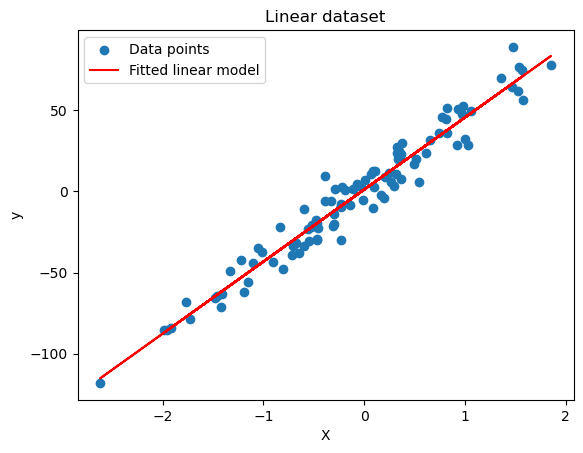

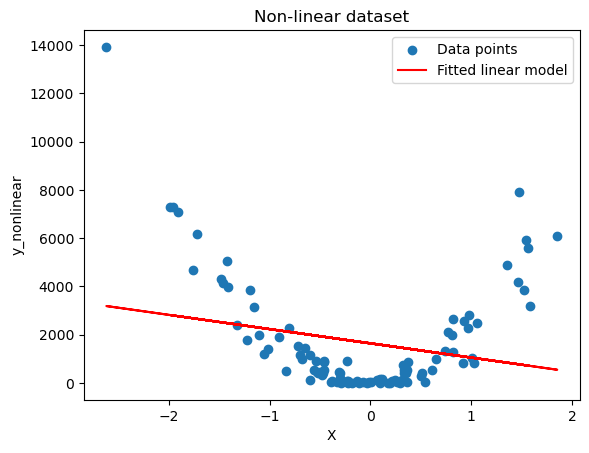

In [3]:
# Non-linear y
y_nonlinear = y ** 2

# Fit a linear regression model to the linear dataset
X1 = sm.add_constant(X)
linear_model = sm.OLS(y, X1).fit()

# Fit a linear regression model to the non-linear dataset
nonlinear_model = sm.OLS(y_nonlinear, X1).fit()

# Plot the linear dataset and fitted model
plt.scatter(X, y, label='Data points')
plt.plot(X, linear_model.predict(X1), color='red', label='Fitted linear model')
plt.legend()
plt.title('Linear dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Plot the non-linear dataset and fitted model
plt.scatter(X, y_nonlinear, label='Data points')
plt.plot(X, nonlinear_model.predict(X1), color='red', label='Fitted linear model')
plt.legend()
plt.title('Non-linear dataset')
plt.xlabel('X')
plt.ylabel('y_nonlinear')
plt.show()


## Independence

In [4]:
# Dataset with independent variables
X, y = make_regression(n_samples=100, n_features=2, noise=30, random_state=42)

# Dataset with multicollinear variables
X_multicollinear = X.copy()
X_multicollinear[:, 1] = 2 * X[:, 0] + np.random.normal(0, 0.1, size=X[:, 0].shape)

In [5]:
# Fit a linear regression model to the independent dataset
X1 = sm.add_constant(X)
independent_model = sm.OLS(y, X1).fit()

# Fit a linear regression model to the multicollinear dataset
X2 = sm.add_constant(X_multicollinear)
multicollinear_model = sm.OLS(y, X2).fit()


In [6]:
print("Independent dataset:")
print(independent_model.summary())

print("Multicollinear dataset:")
print(multicollinear_model.summary())


Independent dataset:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     502.2
Date:                Fri, 12 May 2023   Prob (F-statistic):           6.69e-52
Time:                        12:56:15   Log-Likelihood:                -489.01
No. Observations:                 100   AIC:                             984.0
Df Residuals:                      97   BIC:                             991.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6491      3.29

### Diagnostics:

<span style="color: black; font-family: Helvetica; font-size: 22px;">The summary shows that the standard errors of the coefficient estimates are larger for the multicollinear dataset compared to the independent dataset. This is a direct result of multicollinearity, which causes the following problems:</span>  

<span style="color: black; font-family: Helvetica; font-size: 18px;">1) Unreliable coefficient estimates: The coefficient estimates become unstable and unreliable, making it difficult to interpret the individual effect of each predictor on the response variable.</span> 

<span style="color: black; font-family: Helvetica; font-size: 18px;">2) Increased standard errors: The standard errors of the coefficients are inflated, which leads to wider confidence intervals and less reliable hypothesis tests, making it harder to determine the statistical significance of individual predictors.</span>  





### Dealing with multicollinearity:

<span style="color: black; font-family: Helvetica; font-size: 22px;">Variance Inflation Factor (VIF):</span>  

<span style="color: black; font-family: Helvetica; font-size: 18px;"> VIF  is a measure used to detect multicollinearity in regression models. Multicollinearity occurs when two or more independent variables are highly correlated, which can lead to unreliable coefficient estimates and inflated standard errors. VIF quantifies the severity of multicollinearity by assessing how much the variance of a regression coefficient is increased due to multicollinearity. The VIF for an independent variable is calculated as:</span>  
    
<span style="color: black; font-family: Helvetica; font-size: 18px;">VIF = 1 / (1 - R^2) </span>  

<span style="color: black; font-family: Helvetica; font-size: 18px;"> R^2 is the coefficient of determination obtained from a linear regression model in which the given independent variable is regressed on all other independent variables. A VIF of 1 indicates no multicollinearity, while VIF values greater than 1 imply the presence of multicollinearity. Generally, a VIF value greater than 10 is considered to indicate severe multicollinearity, although some sources suggest using a lower threshold, such as 5.</span>  



In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()

vif["variable"] = ['constant', 'X1', 'X2']
vif["VIF for X1"] = [variance_inflation_factor(X1, i) for i in range(X1.shape[1])]
vif["VIF for X2"] = [variance_inflation_factor(X2, i) for i in range(X2.shape[1])]

print(vif)

   variable  VIF for X1  VIF for X2
0  constant    1.019890    1.019910
1        X1    1.001046  285.964247
2        X2    1.001046  285.964247


<span style="color: black; font-family: Helvetica; font-size: 18px;"> The advantage of using VIF is that it provides a quantitative measure of multicollinearity, which helps in identifying problematic variables. However, VIF has some limitations.</span> 

<span style="color: black; font-family: Helvetica; font-size: 18px;"> 1) VIF depends on the threshold chosen for multicollinearity detection. The common threshold of 10 is somewhat arbitrary, and different researchers might use different thresholds, leading to inconsistent conclusions.</span> 

<span style="color: black; font-family: Helvetica; font-size: 18px;"> 2) VIF is sensitive to the scale of the independent variables. If variables have different units or magnitudes, the VIF values might be misleading. It is recommended to standardize the independent variables before calculating VIF.</span> 

<span style="color: black; font-family: Helvetica; font-size: 18px;"> 3) VIF only considers linear relationships between the independent variables. It does not account for non-linear dependencies or interactions between the variables, which might also contribute to multicollinearity.
</span> 






<span style="color: black; font-family: Helvetica; font-size: 22px;">Principal Component Analysis (PCA):</span>  

<span style="color: black; font-family: Helvetica; font-size: 18px;"> Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform a set of correlated variables into a new set of uncorrelated variables called principal components. These principal components are linear combinations of the original variables and are ordered by the amount of variance they explain in the data. The first principal component explains the largest proportion of the variance, the second principal component explains the second-largest proportion, and so on. </span>  

<span style="color: black; font-family: Helvetica; font-size: 22px;">Pros:</span>  
<span style="color: black; font-family: Helvetica; font-size: 18px;">1) Reduces multicollinearity: PCA creates uncorrelated principal components, eliminating the multicollinearity issue in the regression model.</span>  
<span style="color: black; font-family: Helvetica; font-size: 18px;">2) Reduces noise: PCA helps filter out noise by retaining only the most important components that explain the majority of the variance in the data.</span>  
<span style="color: black; font-family: Helvetica; font-size: 18px;">3) Dimensonality reduction: PCA reduces the number of variables in the dataset, which can simplify the model, speed up computation, and mitigate the risk of overfitting.</span>  

<span style="color: black; font-family: Helvetica; font-size: 22px;">Cons:</span>  
<span style="color: black; font-family: Helvetica; font-size: 18px;">Loss of interpretability: Principal components are linear combinations of the original variables and can be difficult to interpret in the context of the original variables. This makes it challenging to understand the relationship between the dependent variable and the original independent variables.</span>  
<span style="color: black; font-family: Helvetica; font-size: 18px;">Information loss: PCA may lead to some loss of information, especially when reducing the dimensionality of the dataset by discarding lower-variance components.</span>  
<span style="color: black; font-family: Helvetica; font-size: 18px;">Sensitivity to scaling: PCA is sensitive to the scaling of the variables. It is important to standardize the variables before applying PCA, as variables with larger scales can dominate the principal components.</span>  



In [8]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


In [9]:
# Create a dataset with independent variables
X, y = make_regression(n_samples=100, n_features=3, noise=30, random_state=42)

# Create a dataset with multicollinear variables
X_multicollinear = X.copy()
X_multicollinear[:, 1] = 2 * X[:, 0] + np.random.normal(0, 0.1, size=X[:, 0].shape)
X_multicollinear[:, 2] = 1.5 * X[:, 0] + 0.7 * X[:, 1] + np.random.normal(0, 0.1, size=X[:, 0].shape)

# Step 1: Standardize the dataset
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_multicollinear)

# Step 2: Apply PCA to the standardized data
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_standardized)

model_original = sm.OLS(y, X_standardized).fit()
model_pca = sm.OLS(y, X_pca).fit()

print(model_original.summary(), model_pca.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.807
Method:                 Least Squares   F-statistic:                              140.6
Date:                Fri, 12 May 2023   Prob (F-statistic):                    3.41e-35
Time:                        12:56:15   Log-Likelihood:                         -503.16
No. Observations:                 100   AIC:                                      1012.
Df Residuals:                      97   BIC:                                      1020.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<span style="color: gray; font-family: Helvetica; font-size: 40px;">Logistic regression</span>

## Goal:
<span style="color: black; font-family: Helvetica; font-size: 20px;">Logistic regression is a statistical method used for analyzing datasets where the dependent variable is binary (i.e., it has two possible outcomes). The goal of logistic regression is to model the probability of one outcome (usually the "success" or "event" outcome) as a function of one or more independent variables. Logistic regression can be extended to handle multinomial dependent variables with more than two categories, called Multinomial Logistic Regression, or ordered dependent variables, called Ordinal Logistic Regression. </span>  

## Equation:
<span style="color: black; font-family: Helvetica; font-size: 20px;"> Logistic regression works by fitting a logistic function (also known as a sigmoid function) to the data. The logistic function has the following form: P(Y=1|X) = 1 / (1 + exp(-z)) where z = β0 + β1 * X1 + β2 * X2 + ... + βn * Xn, and P(Y=1|X) is the probability of the outcome Y being 1, given the independent variables X.</span>  


## Estimation: 
<span style="color: black; font-family: Helvetica; font-size: 20px;"> Logistic regression estimates the coefficients (β) by maximizing the likelihood of the observed data. The process, called Maximum Likelihood Estimation (MLE), finds the set of coefficients that maximizes the probability of obtaining the observed outcomes in the dataset, given the predictor variables. Most statistical software packages, including Python's scikit-learn and statsmodels libraries, implement algorithms like Newton-Raphson or iteratively reweighted least squares to perform MLE.</span> 

## Prediction: 
<span style="color: black; font-family: Helvetica; font-size: 20px;"> Once the coefficients are estimated, the model can be used to predict the probability of the outcome for new observations. By plugging in the values of the independent variables into the logistic function, we can obtain the predicted probability of Y=1. To make a binary classification, we can set a threshold (typically 0.5) and classify observations with probabilities above the threshold as 1 (success) and below the threshold as 0 (failure)</span> 

In [10]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a binary classification dataset
X, y = make_classification(n_samples=2000, n_features=8, n_classes=2, n_informative= 2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Obtain the estimated coefficients
coefficients = np.hstack((log_reg.intercept_, log_reg.coef_[0]))
print("Estimated coefficients:", coefficients)

# Make predictions on the test set
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability of outcome Y=1
y_pred = log_reg.predict(X_test)  # Binary prediction based on 0.5 threshold

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Estimated coefficients: [-0.044541   -0.74468483  0.17741747 -0.10228592 -0.33659238  0.05026816
 -0.10188199 -1.08917607  1.11907548]
Accuracy: 0.885


In [11]:
n_samples = 200 # Number of samples
n_features = 6 # Number of features
n_informative = 3 # Number of informative features i.e. actual features which influence the output

In [12]:
X, y= make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative, noise=1)

In [13]:
df1 = pd.DataFrame(data=X,columns=['X'+str(i) for i in range(1,n_features+1)])
df2=pd.DataFrame(data=y,columns=['y'])
df=pd.concat([df1,df2],axis=1)
df.head(10)

,X1,X2,X3,X4,X5,X6,y
0,0.850146,0.116232,0.028297,-0.747386,-1.619047,-2.912935,31.200770
1,-1.409866,-0.821662,-0.641057,1.424634,-0.018981,0.436430,-141.607972
2,-0.911275,1.254758,-0.012774,-1.327705,-0.258168,-0.727320,74.474786
3,-1.332052,0.283883,0.823314,-1.152907,0.356726,1.425686,49.831984
4,0.065034,-0.183321,0.261251,-1.329003,-0.469303,0.485221,4.912274
5,0.036793,0.366875,1.054552,-1.489506,-0.431231,-1.824001,100.891513
6,-1.040307,1.323448,0.390313,-0.025300,-0.009351,-1.103699,103.505118
7,-0.750858,0.093152,0.198763,-0.301013,1.301932,1.038744,4.803717
8,0.938941,-0.426563,-0.890455,-1.853738,0.511295,-0.124330,-71.277917
9,0.047028,-1.303130,0.419436,0.043895,0.960474,-2.526185,-74.852205


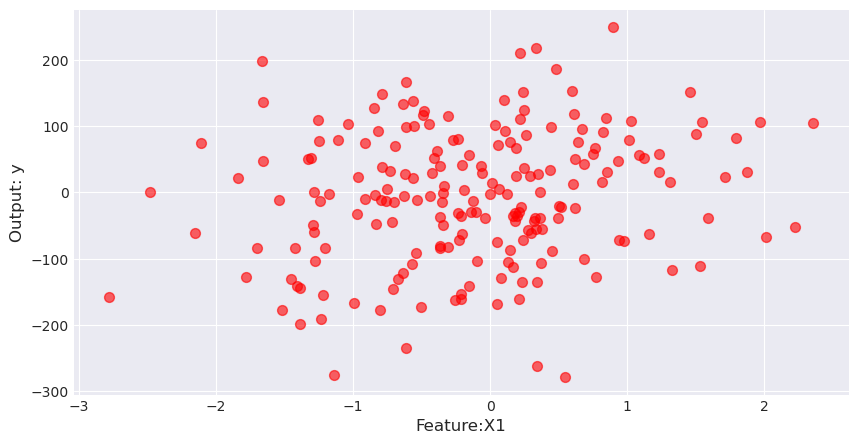

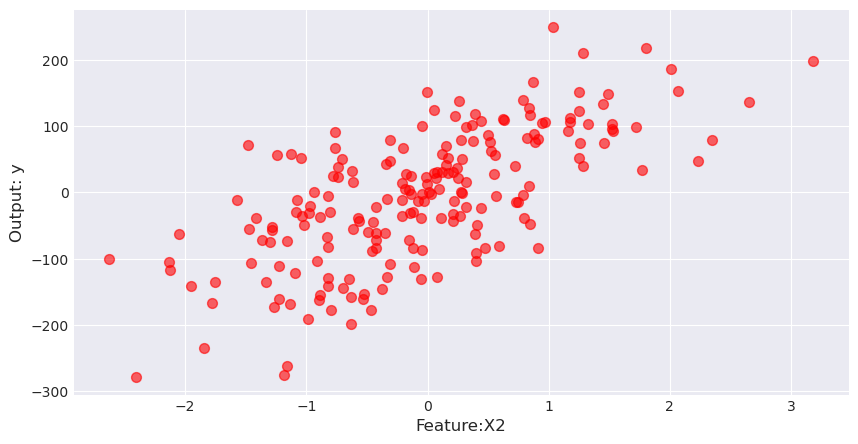

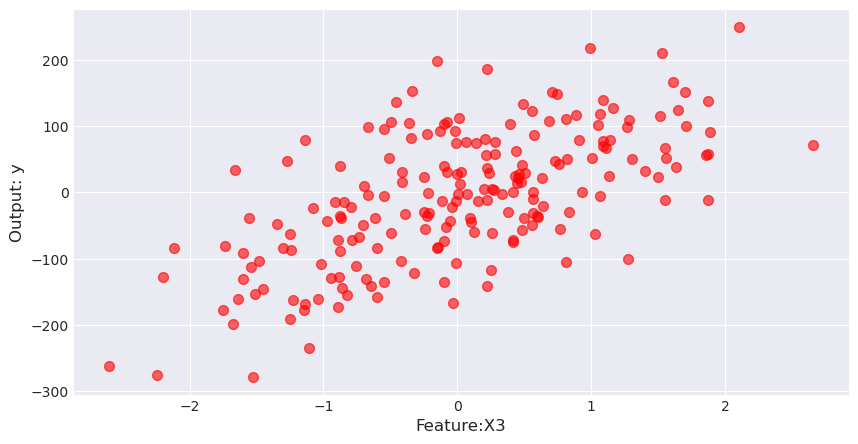

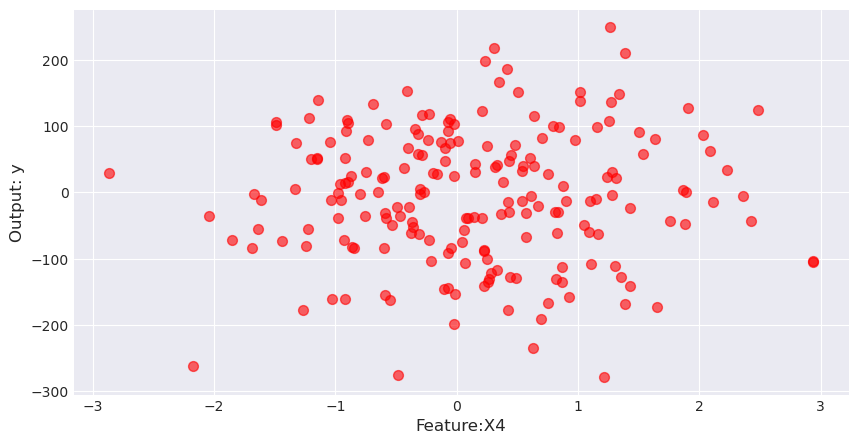

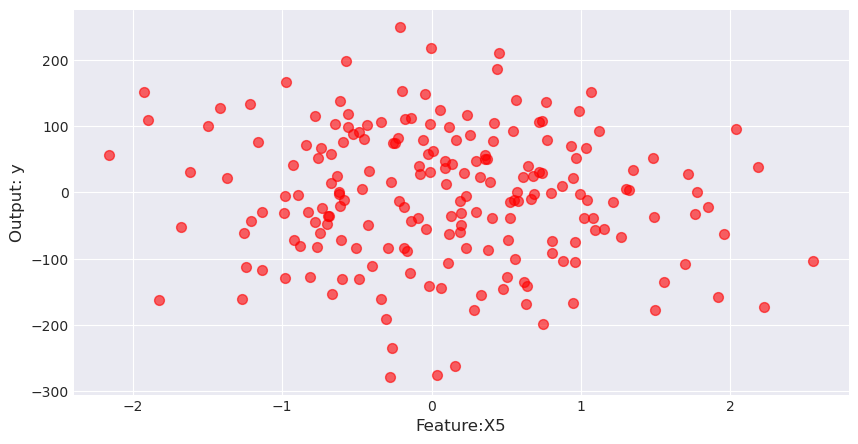

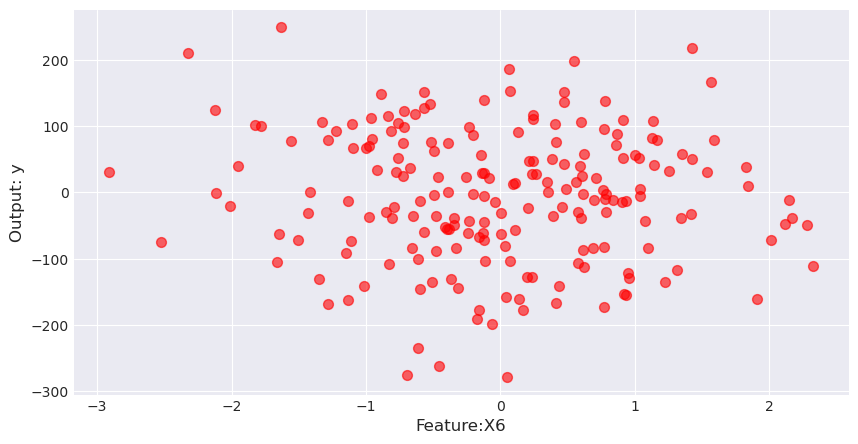

In [14]:
with plt.style.context(('seaborn-dark')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(10,5))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.scatter(df[col],df['y'],c='red',s=50,alpha=0.6)

In [15]:
model = sm.OLS(y, X).fit()

In [16]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.591e+05
Date:                Fri, 12 May 2023   Prob (F-statistic):                        0.00
Time:                        12:56:16   Log-Likelihood:                         -304.60
No. Observations:                 200   AIC:                                      621.2
Df Residuals:                     194   BIC:                                      641.0
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            23.5892      0.088    267.044      0.000      23.415      23.763
x2            78.0655      0.082    950.661      0.000      77.904      78.227
x3            69.3638      0.083    838.918      0.000      69.201      69.527
x4            -0.0276      0.078     -0.355      0.723      -0.181       0.126
x5            -0.0592      0.091     -0.647      0.518      -0.240       0.121
x6             0.1635      0.081      2.023      0.044       0.004       0.323
==============================================================================
Omnibus:                        1.003   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.606   Jarque-Bera (JB):                0.758
Skew:                          -0.141   Prob(JB):                        0.685
Kurtosis:                       3.106   Cond. No.                         1.35
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""